In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = 'Data'
class_names = ['Colosseum', 'Eiffel Tower', 'Petra', 'Egypt Pyramids', 'Sudan Pyramids', 
               'London Bridge', 'Statue of Liberty', 'Big Ben', 'Taj Mahal', 'Sydney Opera House']

# Load and preprocess images
X = []
y = []
for idx, folder in enumerate(class_names):
    folder_path = os.path.join(data_dir, folder)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            img = cv2.imread(image_path)
            img = cv2.resize(img, (160, 160))  # Resize to match CNN input size
            X.append(img.flatten())
            y.append(idx)
        except Exception as e:
            print('Issue with image {}'.format(image_path))



In [3]:
X = np.array(X)
y = np.array(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the SVM model
svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train_scaled, y_train)



SVC(C=10)

In [4]:
# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred, target_names=class_names))

                    precision    recall  f1-score   support

         Colosseum       0.53      0.76      0.63        21
      Eiffel Tower       0.73      0.59      0.66        32
             Petra       0.89      0.86      0.87        36
    Egypt Pyramids       0.40      0.50      0.44        12
    Sudan Pyramids       0.83      0.78      0.80        45
     London Bridge       0.67      0.60      0.63        30
 Statue of Liberty       0.74      0.76      0.75        37
           Big Ben       0.65      0.65      0.65        34
         Taj Mahal       0.73      0.79      0.76        38
Sydney Opera House       0.67      0.59      0.63        27

          accuracy                           0.71       312
         macro avg       0.68      0.69      0.68       312
      weighted avg       0.72      0.71      0.71       312



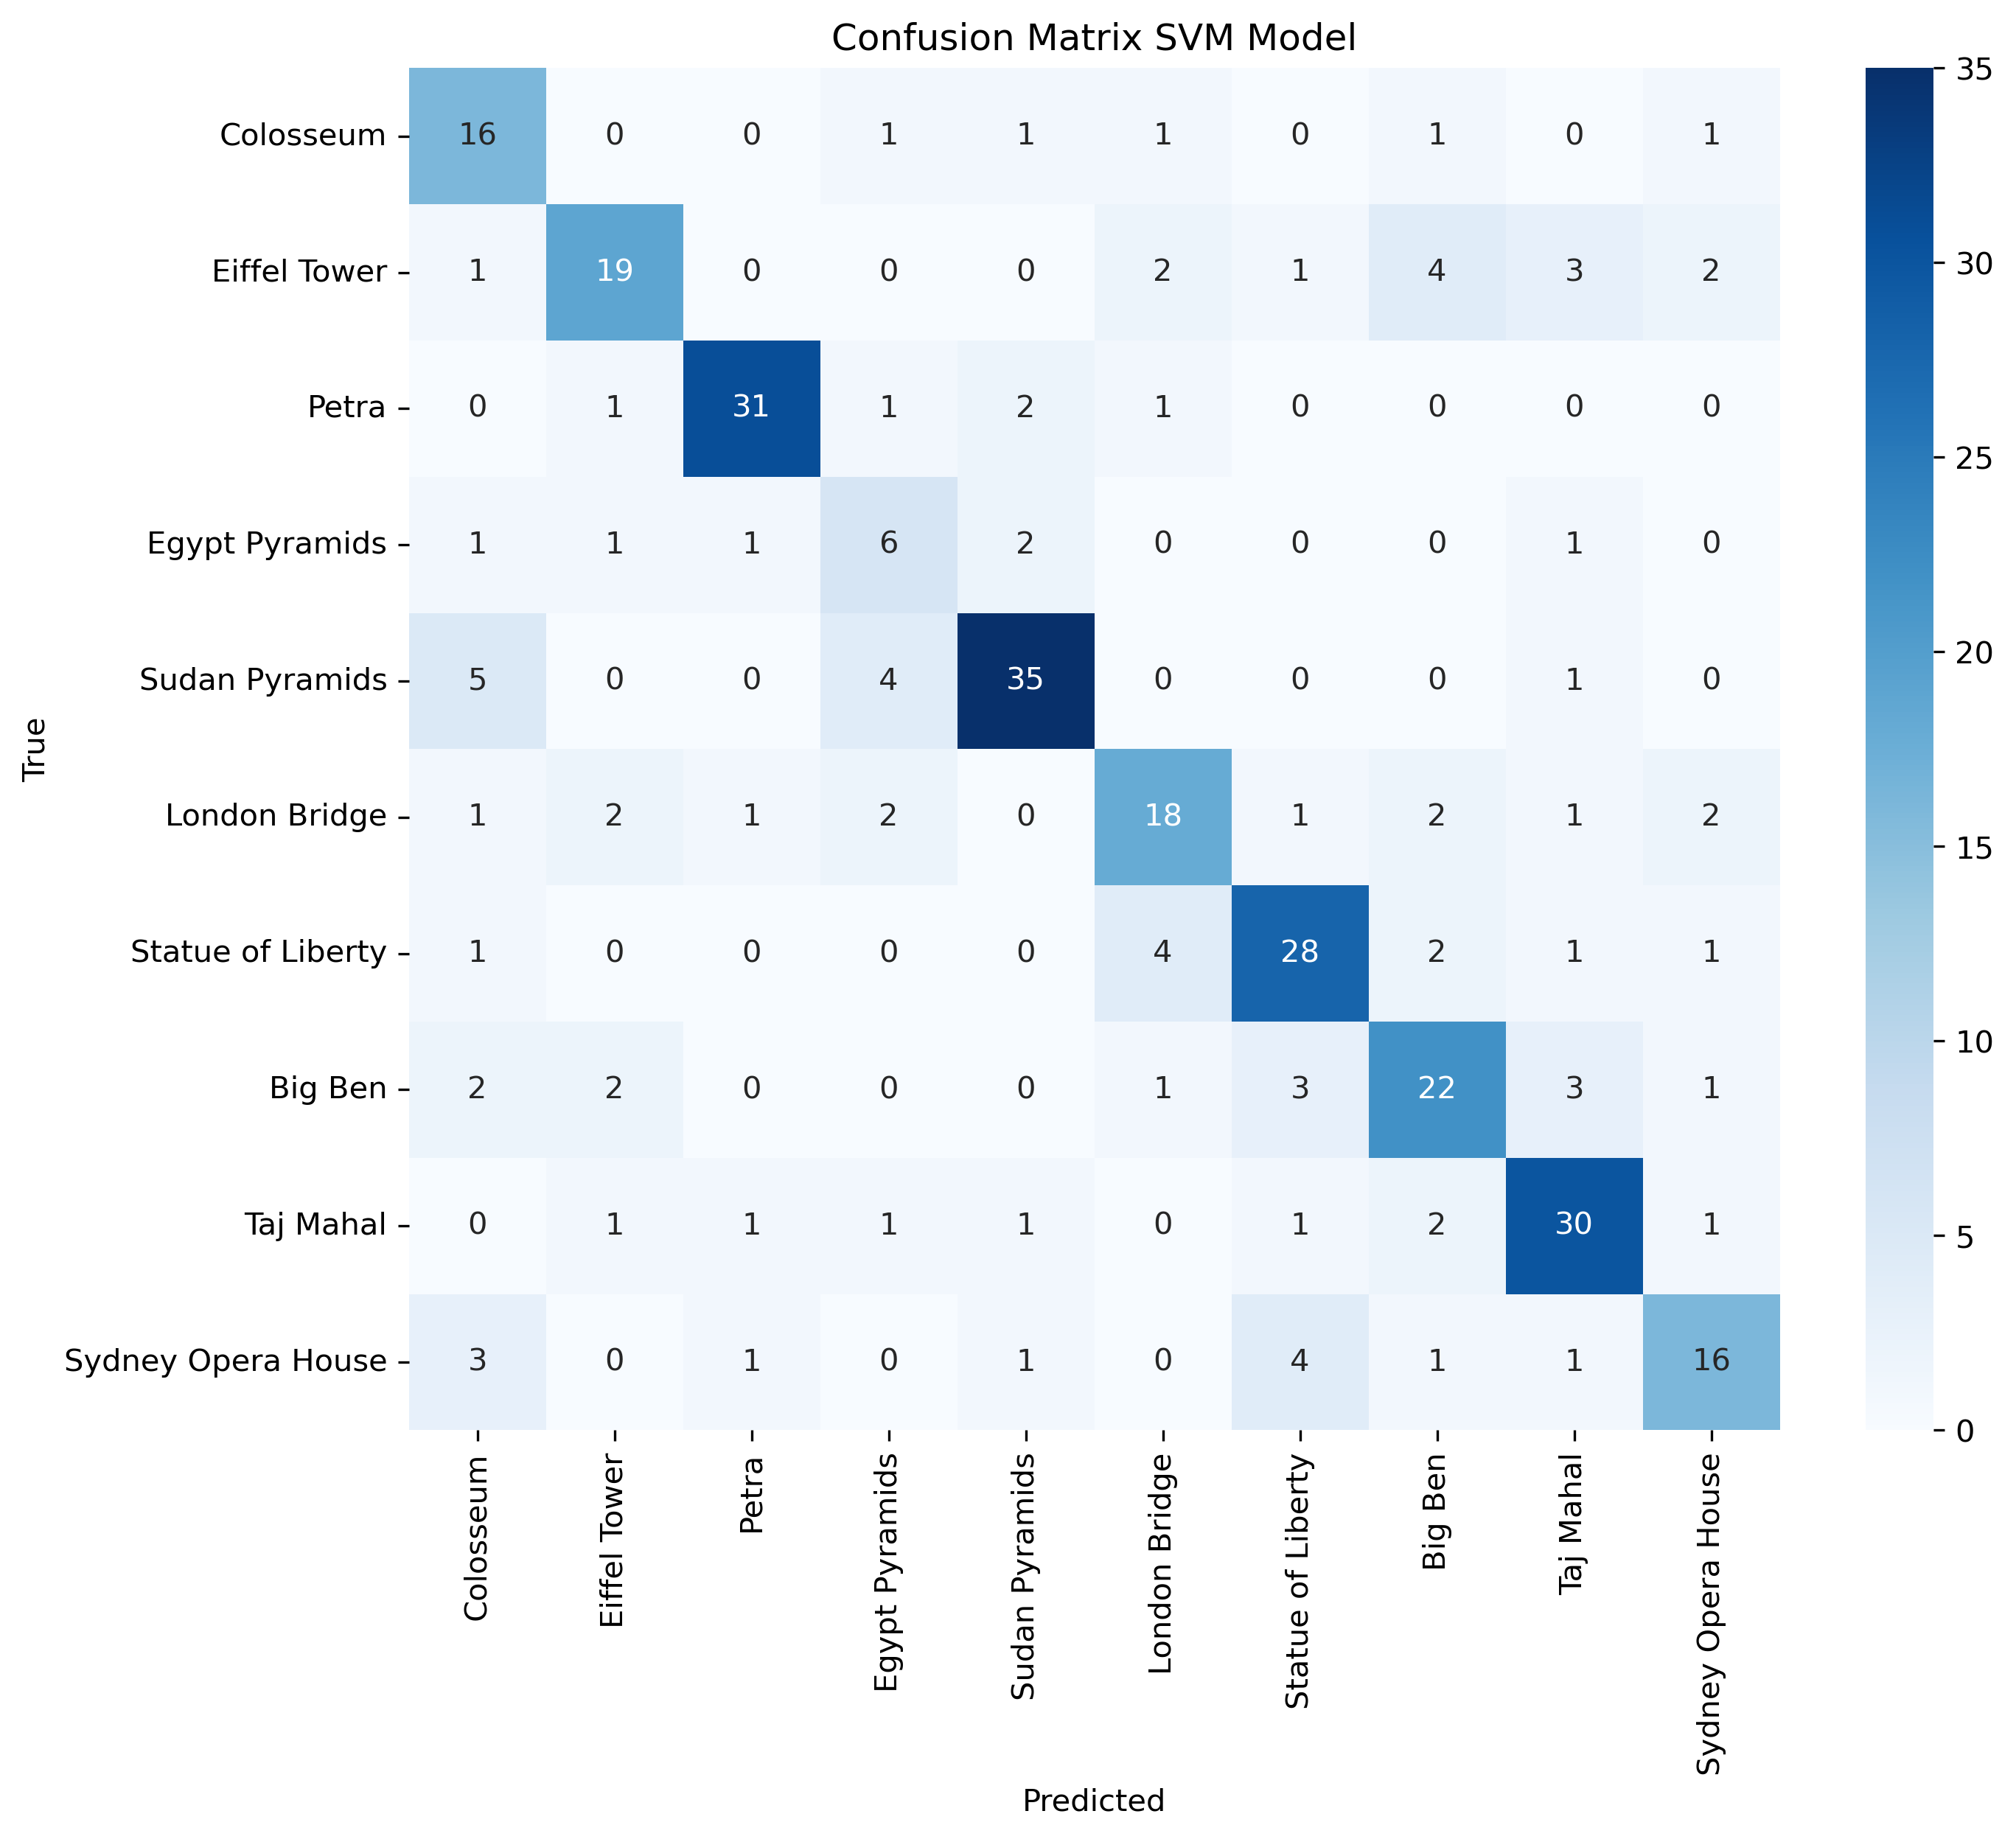

In [13]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix SVM Model')
plt.show()

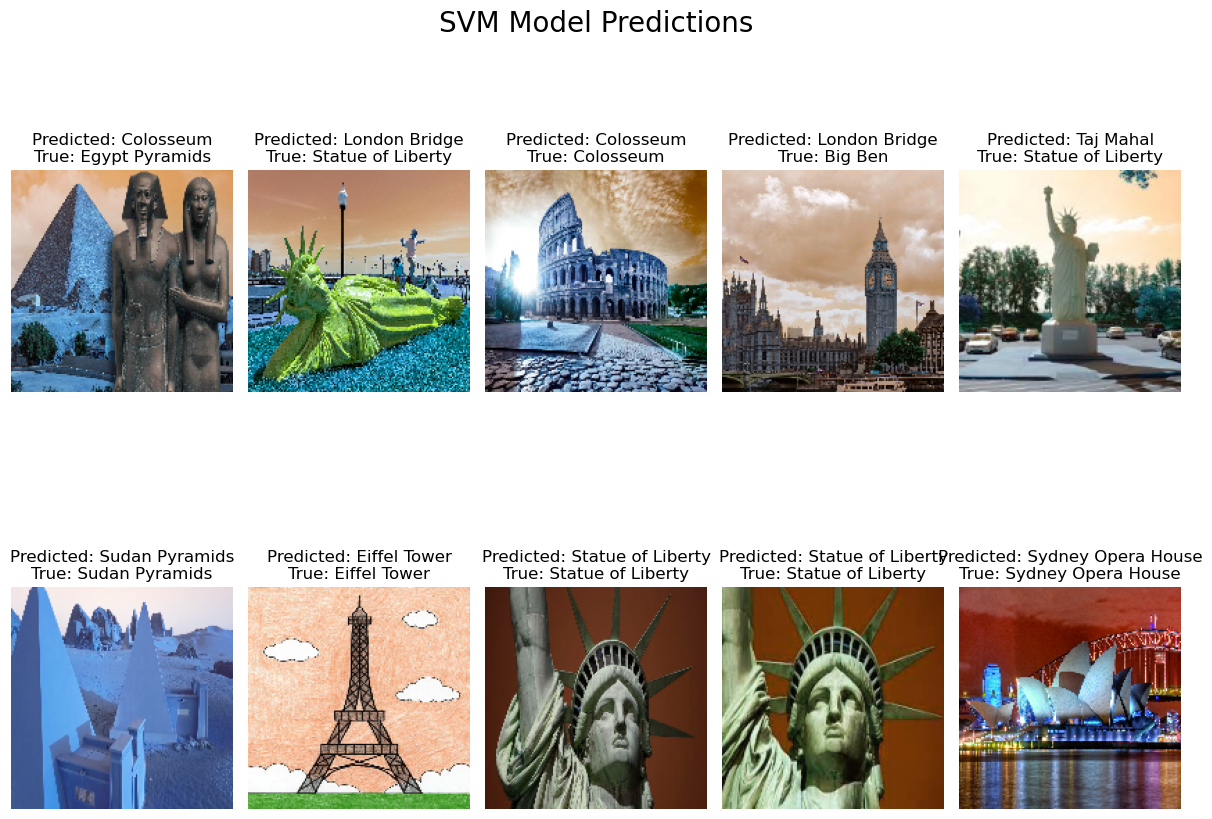

In [12]:
# Get a batch of images from the test dataset (replace this with your actual data)
sample_images, sample_labels = X_test[:10], y_test[:10]
sample_images_scaled = scaler.transform(sample_images.reshape(sample_images.shape[0], -1))

# Making predictions on the scaled sample images
sample_predictions = svm_model.predict(sample_images_scaled)

# Map predicted labels to class names
predicted_labels = [class_names[prediction] for prediction in sample_predictions]

# Create a figure with a grid of subplots for visualization
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))

# Loop through the subplots
for i in range(2):
    for j in range(5):
        idx = i * 5 + j  # Calculate the index
        
        # Reshape and rescale the image for visualization
        image = sample_images[idx] / 255.0
        image = image.reshape((160, 160, 3))  # Reshape to original dimensions
        
        ax[i, j].set_title(f"Predicted: {predicted_labels[idx]}\nTrue: {class_names[sample_labels[idx]]}")
        ax[i, j].imshow(image)
        ax[i, j].axis("off")

# Increase the resolution of the images
plt.rcParams["figure.dpi"] = 300

# Display the images
plt.tight_layout()
plt.suptitle("SVM Model Predictions", fontsize=20)
plt.show()

